### Question 1. (k-NN classifier and 5-fold cross validation)
We want to train a k-NN classifier for the Crop Recommendation Dataset.
Create a training set that contains 80% of the labeled data and create a test set that contains the
remaining 20%.
Use 5-fold cross validation on the training set to select the best k from [1,50] for the k-NN classifier.
Use that k to report the k-NN classification accuracy on the test set. Submit k and the source code.
[Hints: Use KFold from sklearn.model_selection to split the data into 5 folds. See
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html for an
example on how to use KFold].

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#Data Loading
data = pd.read_csv("Crop_Recommendation.csv")

X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_k = 0
best_score = 0


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring="accuracy")
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"Best k value: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set with k={best_k}: {accuracy:.4f}")


Best k value: 3
Accuracy on test set with k=3: 0.9682


### Question 2. (ROC Curve)
Convert the problem in the Crop Recommendation Dataset into a binary classification task (rice
versus non-rice). We can do so by replacing the class labels of the instances to non-rice except for
those that belong to the rice class.
Create a training set that contains 80% of the labeled data and create a test set that contains the
remaining 20%. Train a logistic regression classifier using the training set. Plot the ROC curve for
the rice class (positive class) when applying the logistic regression classifier to the test set. Submit
the plot and the source code.
[Hints: Use class LogisticRegression from sklearn.linear_model. Use roc_curve from
sklearn.metrics for computing the ROC Curve. Use matplotlib.pyplot to plot the ROC
curve. You can get the probability score used for computing ROC curve by using the method
predict_proba in the LogisticRegression class].

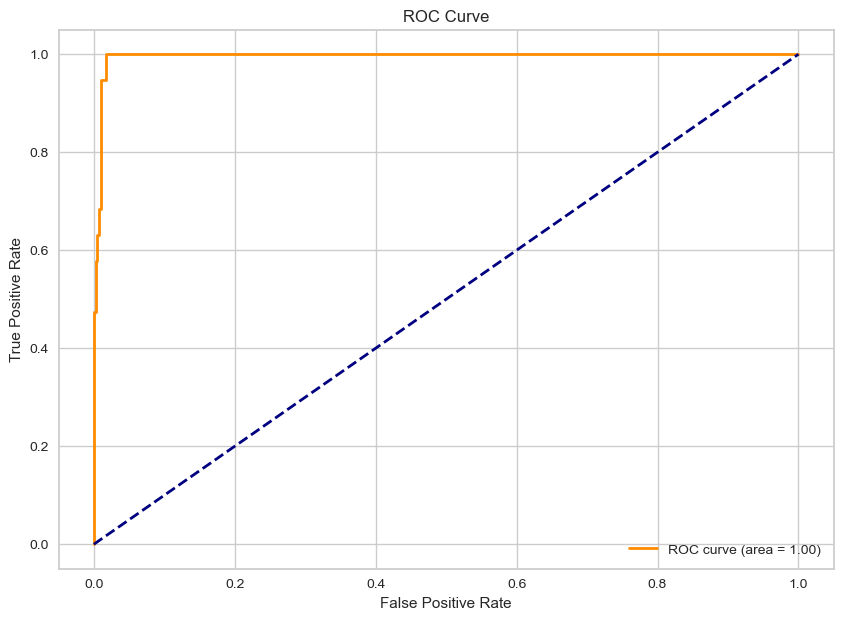

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load dataset
data = pd.read_csv('Crop_Recommendation.csv')

# Make it a binary problem: rice vs. others
data['label'] = np.where(data['label'] == 'rice', 'rice', 'non-rice')

# Split data
X = data.drop('label', axis=1)
y = data['label']
y = np.where(y == 'rice', 1, 0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Question 3. (SMS Text Classification)
We will use the SMS Spam Collection Data Set from the UCI machine learning repository. The
dataset includes SMS labeled messages that have been collected for SMS Spam research. It
contains one set of SMS messages in English of 5,574 messages, labeled as being ham
(legitimate) or spam. The text file SMSSpamCollection contains one message per line. Each line is
composed of two columns: one with a label (ham or spam) and the other with the raw text. Here are
some examples:
ham What you doing? how are you?
ham Siva is in hostel aha:-.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk
time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16
stop?txtStop
The dataset has a total of 4,827 SMS legitimate messages (86.6%) and a total of 747 (13.4%)
spam messages. Please refer to https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection for
more detailed descriptions.
Please use 80% of the available data for training and the rest 20% for testing. Train an SVM
classifier and a Random Forest classifier for classifying spam messages, then show the accuracies
and the confusion matrices of the two classifiers on the testing data.
[Hint: You can represent each message using a tf-idf vector. Please refer to the tutorial “Fall 2023-
CS488/508: Text Classification, Time Series Classification.ipynb.” for an example].


SVM Classifier Accuracy: 0.9901345291479821
SVM Confusion Matrix:
 [[965   1]
 [ 10 139]]

Random Forest Classifier Accuracy: 0.9811659192825112
Random Forest Confusion Matrix:
 [[966   0]
 [ 21 128]]


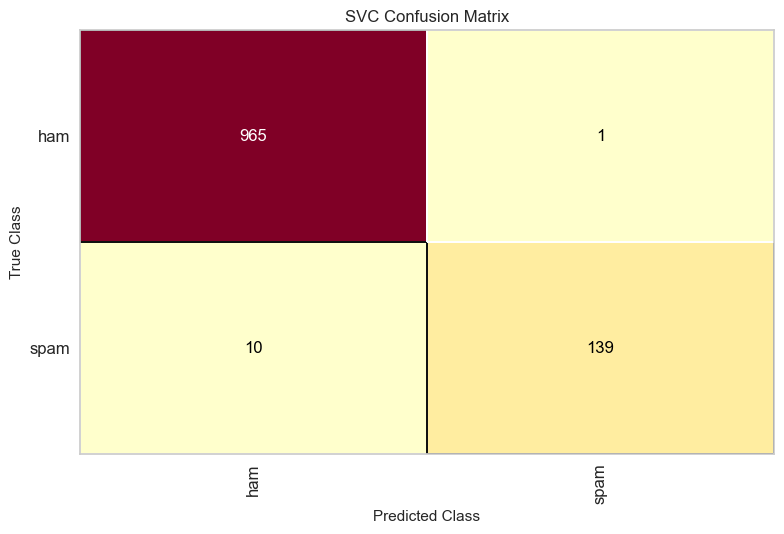

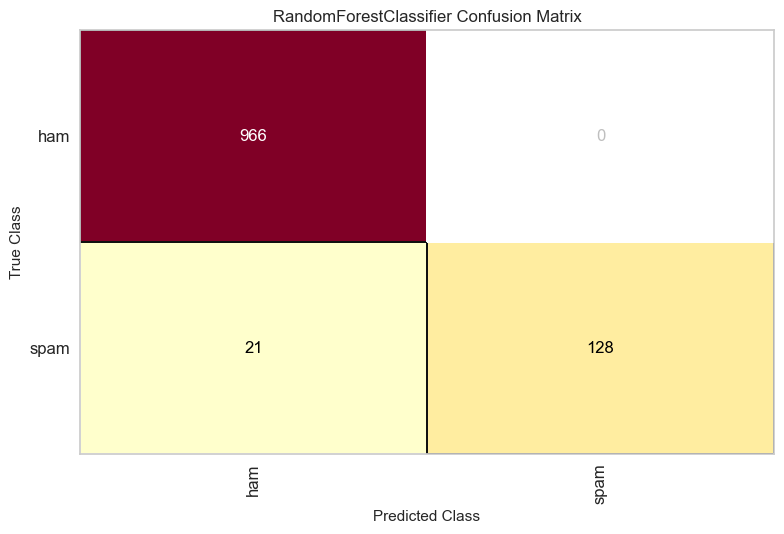

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

# Load data 
data = pd.read_csv('SMSSpamCollection', sep="\t", header=None, names=['label', 'message'])

# Convert messages to lowercase
data['message'] = data['message'].str.lower()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Convert text data into tf-idf vectors
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# SVM classifier
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(X_train_transformed, y_train)
svm_y_pred = svm_clf.predict(X_test_transformed)

# Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_transformed, y_train)
rf_y_pred = rf_clf.predict(X_test_transformed)

# Evaluation
print("SVM Classifier Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred, labels=["ham", "spam"]))

print("\nRandom Forest Classifier Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred, labels=["ham", "spam"]))

#  Visualize SVM
visualizer_svm = ConfusionMatrix(svm_clf, classes=["ham", "spam"])
visualizer_svm.fit(X_train_transformed, y_train)
visualizer_svm.score(X_test_transformed, y_test)
visualizer_svm.poof(title='Confusion Matrix for SVM')

#  Visualize Random Forest
visualizer_rf = ConfusionMatrix(rf_clf, classes=["ham", "spam"])
visualizer_rf.fit(X_train_transformed, y_train)
visualizer_rf.score(X_test_transformed, y_test)
visualizer_rf.poof(title='Confusion Matrix for Random Forest')
